In [65]:
# Importing required modules
import pandas as pd          
import numpy as np
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # For plotting graphs 
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
plt.show()

In [66]:
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/MARUTI.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [67]:

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4427 entries, 0 to 4426
Data columns (total 7 columns):
Date      4427 non-null object
Open      4427 non-null float64
High      4427 non-null float64
Low       4427 non-null float64
Close     4427 non-null float64
Volume    4427 non-null int64
VWAP      4427 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 242.2+ KB


In [69]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


Text(0, 0.5, 'VWAP')

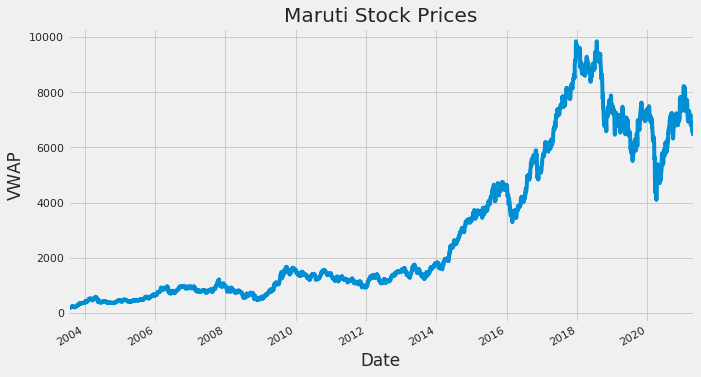

In [70]:
data['VWAP'].plot(figsize=(10,6),title='Maruti Stock Prices')
plt.ylabel('VWAP')

In [71]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

In [72]:
test_date = datetime(my_year, my_month, my_day)
test_date



datetime.datetime(2019, 4, 21, 0, 0)

In [73]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


In [74]:
print(data.index.max())
print(data.index.min())

2021-04-30 00:00:00
2003-07-09 00:00:00


In [75]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())


Earliest date index location is:  0
Latest date location:  4426


In [76]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.set_index("Date", inplace = True)
df_vwap.head()

,VWAP
Date,
2003-07-09,165.95
2003-07-10,166.74
2003-07-11,172.45
2003-07-14,177.91
2003-07-15,176.88


In [77]:
# Slicing on year
vwap_subset = df_vwap['2017':'2020']

# Slicing on month
vwap_subset = df_vwap['2017-01':'2020-12']

#Slicing on day
vwap_subset = df_vwap['2017-01-01':'2020-12-15']

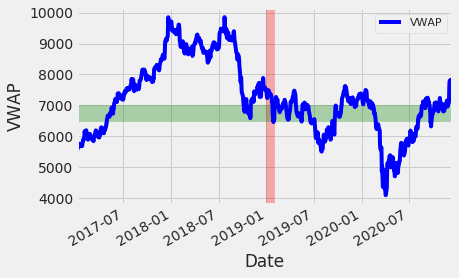

In [78]:
ax = vwap_subset.plot(color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('VWAP')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(6500,7000, color='green',alpha=0.3)

plt.show()

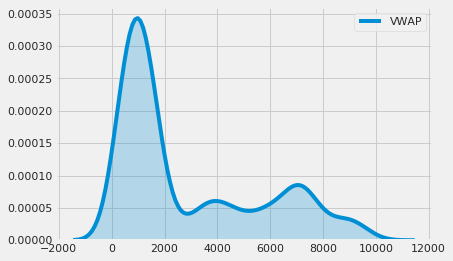

In [79]:
sns.kdeplot(df_vwap['VWAP'],shade=True)

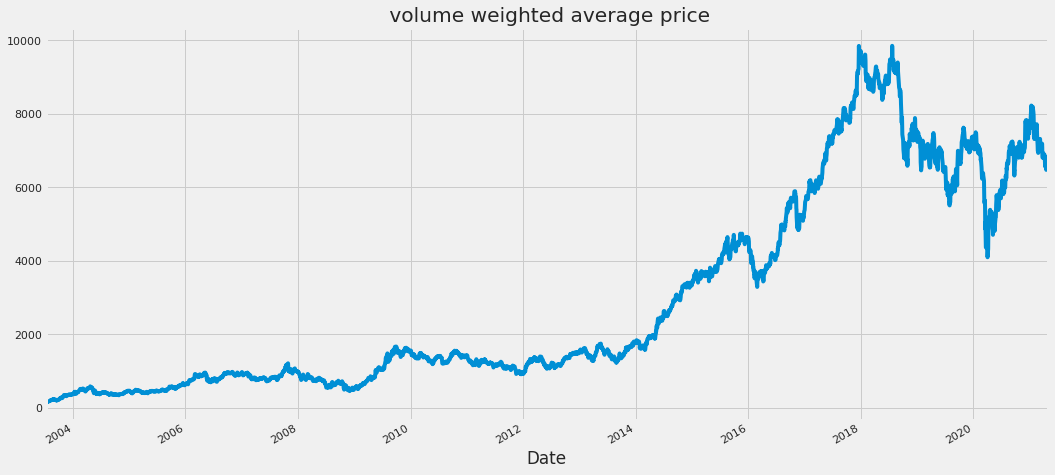

In [80]:
# Visualising the VWAP 
df_vwap['VWAP'].plot(figsize=(16,8),title=' volume weighted average price')

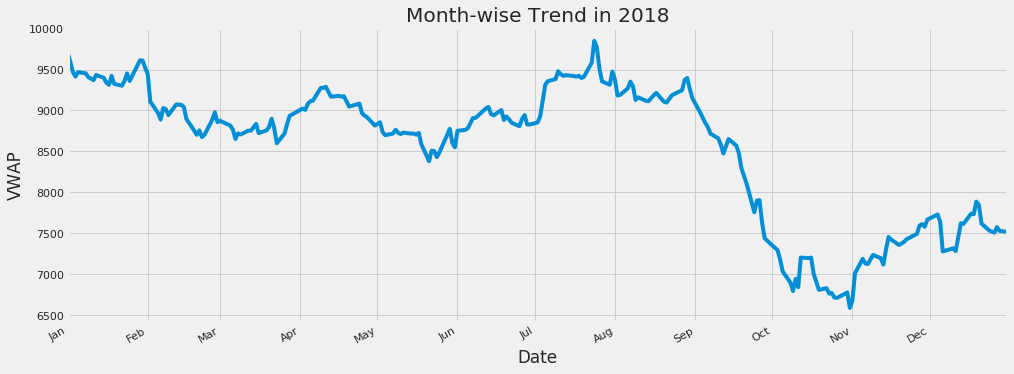

In [81]:
ax = df_vwap.loc['2018', 'VWAP'].plot(figsize=(15,6))
ax.set_title('Month-wise Trend in 2018'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

We see that there was a dip in the stock prices particularly around end of October and November. Let's zoom in on these dates

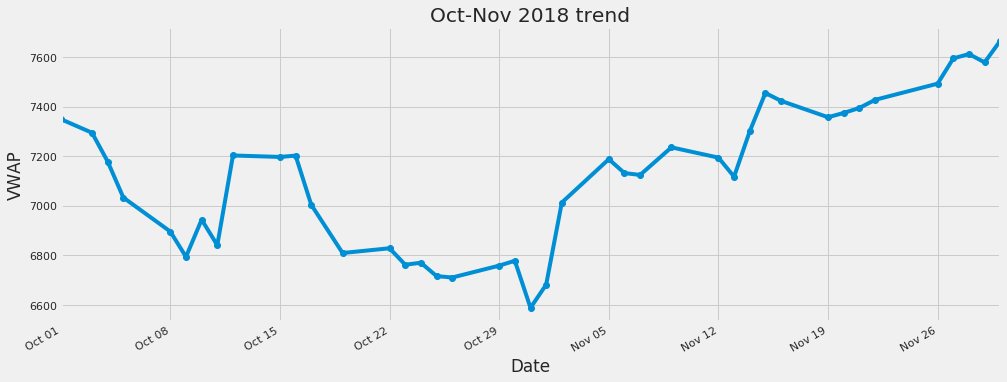

In [82]:
ax = df_vwap.loc['2018-10':'2018-11','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Oct-Nov 2018 trend'); 
ax.set_ylabel('VWAP');
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

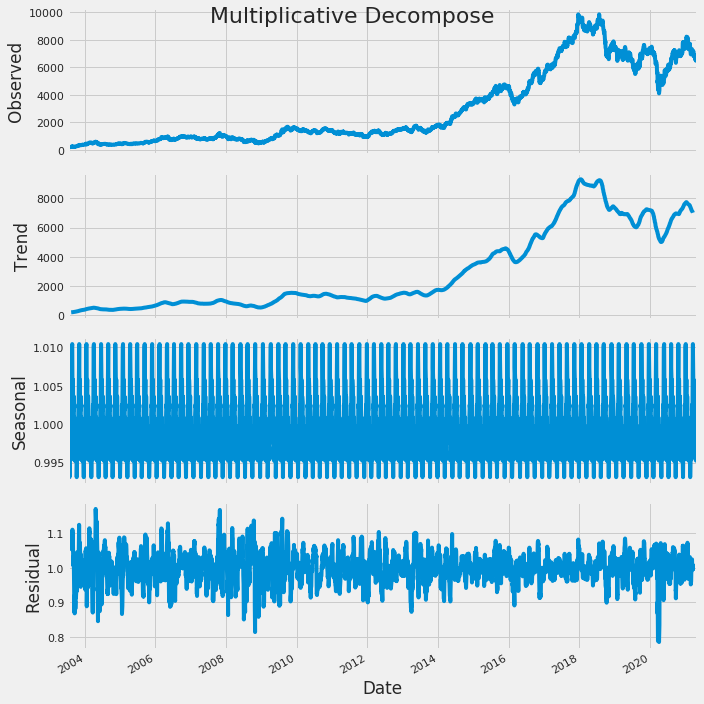

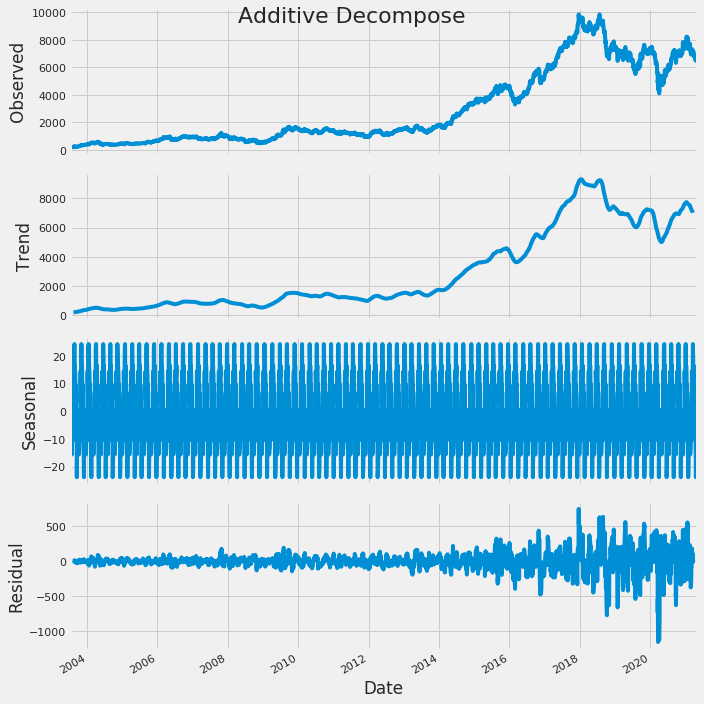

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = df_vwap['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


In [84]:
## Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.tail()

,seas,trend,resid,actual_values
Date,,,,
2021-04-26,0.503451,NaN,NaN,6678.34
2021-04-27,-3.642451,NaN,NaN,6620.68
2021-04-28,-6.863076,NaN,NaN,6598.62
2021-04-29,-1.133388,NaN,NaN,6580.77
2021-04-30,-5.270093,NaN,NaN,6500.51


In [85]:
df_vwap.reset_index(inplace=True)
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek
df_vwap['Weekday Name'] = df_vwap.Date.dt.weekday_name


#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2003-07-09,165.95,2003,7,9,2,Wednesday
2003-07-10,166.74,2003,7,10,3,Thursday
2003-07-11,172.45,2003,7,11,4,Friday
2003-07-14,177.91,2003,7,14,0,Monday
2003-07-15,176.88,2003,7,15,1,Tuesday


In [86]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

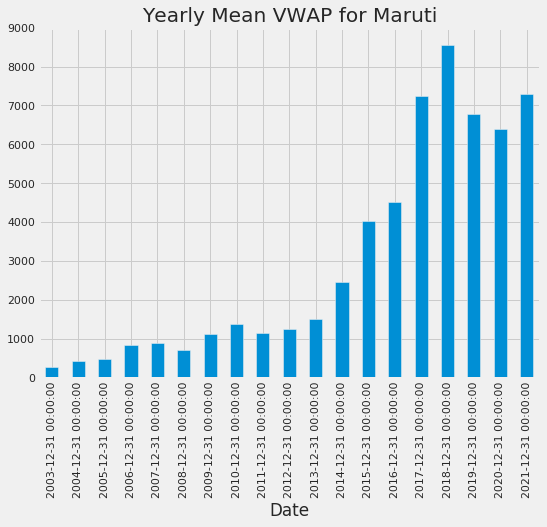

In [87]:
plt.rcParams['figure.figsize'] = (8, 6)
df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean VWAP for Maruti')


In [88]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week,Weekday Name
Date,,,,,,
2003-09-30,165.95,2003,7,9,2,Wednesday
2003-09-30,166.74,2003,7,10,3,Thursday
2003-09-30,172.45,2003,7,11,4,Friday
2003-09-30,177.91,2003,7,14,0,Monday
2003-09-30,176.88,2003,7,15,1,Tuesday


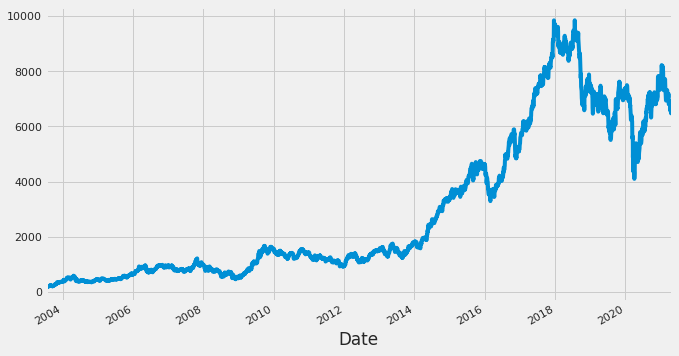

In [89]:
df_vwap['VWAP'].plot(figsize = (10,6))

In [90]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


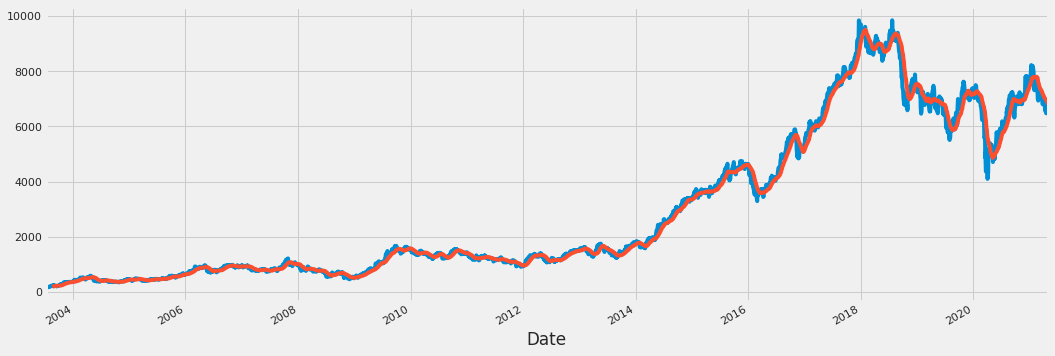

In [91]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))

In [92]:
#Checking for missing values
df_vwap.isnull().sum()

VWAP            0
year            0
month           0
day             0
day of week     0
Weekday Name    0
dtype: int64